# Graph showing Elo according to the date to compare Rodgers and Klopp teams

## Imports

In [1]:
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.patheffects as path_effects
import matplotlib.image as mpimg

from PIL import Image

import datetime
from highlight_text import fig_text

## Retrieve data

In [2]:
bitcoin = pd.read_csv("../data/Bitcoin_Trends.csv")
blockchain = pd.read_csv("../data/Blockchain_Trends.csv")
crypto = pd.read_csv("../data/Crypto_Trends.csv")

In [3]:
bitcoin["Mois"] = pd.to_datetime(bitcoin["Mois"])
blockchain["Mois"] = pd.to_datetime(blockchain["Mois"])
crypto["Mois"] = pd.to_datetime(crypto["Mois"])

In [23]:
bitcoin.tail()

,Mois,Interest
160,2021-05-01,62.0
161,2021-06-01,45.0
162,2021-07-01,30.0
163,2021-08-01,31.0
164,2021-09-01,31.0


In [10]:
type(bitcoin['Mois'][0])

pandas._libs.tslibs.timestamps.Timestamp

## Create the plot

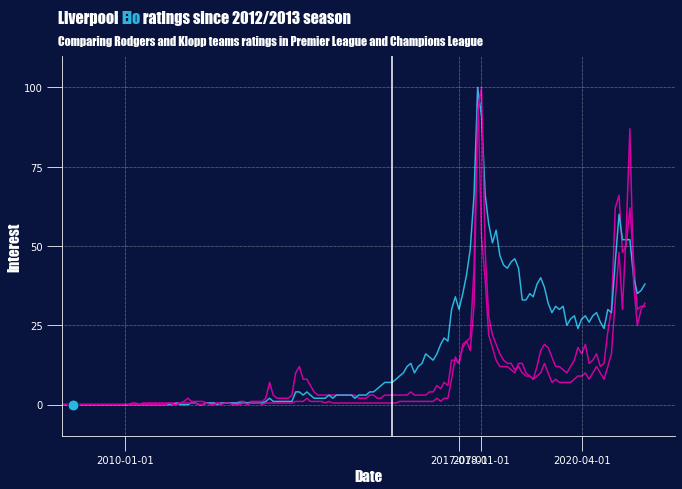

<Figure size 432x288 with 0 Axes>

In [27]:
fig,ax = plt.subplots(figsize = (11,7))

#Add grid to the plot
ax.grid(ls="dotted", lw="0.5", color="w", zorder=1)

hfont = {'fontname':'Impact'}

#Change the background color
fig.set_facecolor("#08143D")
ax.patch.set_facecolor("#08143D")

#Change the ticks color
ax.tick_params(colors="w", length=15)

#Change the axes color
ax.spines['bottom'].set_color("w")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("w")

# Plot the three trends
plt.plot(bitcoin['Mois'], bitcoin['Interest'], zorder=0, color="#D200A4")
plt.plot(blockchain['Mois'], blockchain['Interest'], zorder=0, color="#2bb6e0")
plt.plot(crypto['Mois'], crypto['Interest'], zorder=0, color="#D200A4")

# Set the ticks
plt.xticks(['2008-01-01', '2010-01','2017-07-01', '2018-01-01', '2020-04-01'])
plt.yticks([0,25, 50, 75, 100])
ax.set_ylim(-10,110)
plt.xlim(xmin=datetime.date(2008,8,1))

# Axes Label
plt.xlabel("Date", color="w", fontsize=15 , **hfont)
plt.ylabel("Interest", color="w", fontsize=15 , **hfont)

# Title and credits
fig_text(0.12,0.97, s="Liverpool <Elo> ratings since 2012/2013 season\n", highlight_textprops=[{"color": '#2bb6e0'}], fontsize = 16, fontweight = "bold", color = "w", **hfont)
fig.text(0.12,0.9, "Comparing Rodgers and Klopp teams ratings in Premier League and Champions League", fontsize = 12, fontweight="light", color = "w", **hfont)
#fig.text(0.05, 0, "Created by Jacky KUOCH",fontstyle="italic",fontsize=9, color="w")


# Split the graph in two
ax.axvline(x=datetime.date(2016,1,1), color="w")
#rodgerspart = ax.text(40, 2050, "Rodgers", fontsize=18, ha="center", color="w",alpha=0.4 , **hfont)
#klopppart = ax.text(160, 2050, "Klopp", fontsize=18, ha="center", color="w",alpha=0.4 , **hfont)


# Add points on key dates

## Satoshi Nakamoto paper
ax.scatter(datetime.date(2008,10,31), bitcoin.loc[bitcoin['Mois'] == "2008-11-01", "Interest"], s=120, color="#2bb6e0", edgecolors="#08143D", lw=1, zorder=3 )
#satoshipaper = ax.text(datetime.date(2008,10,31), 0.1, "Satoshi Nakmoto\nPaper", fontsize=13, ha="center", color="#2bb6e0", **hfont)
#satoshipaper.set_path_effects([path_effects.withStroke(linewidth=3, foreground="w")])


plt.show()
plt.tight_layout()
